# 0 Mise en place des fonctions de travail 

In [5]:
from sorting import *
from test import *

In [6]:
# Exemple d'utilisation de la fonction precedente

print(generate_random_array()) # Retourne un tableau avec des nombres naturels allant de 0 a 20
print(generate_random_array(True)) # Retourne le tableau [3, 9, 7, 1, 6, 2, 8, 4, 5, 0]
print(generate_random_array(N=31)) # Des nombres naturels allant de 0 a 30

[6, 15, 12, 11, 8, 3, 14, 20, 17, 9, 19, 1, 4, 2, 18, 16, 5, 0, 13, 10, 7]
[3, 9, 7, 1, 6, 2, 8, 4, 5, 0]
[20, 12, 26, 1, 27, 9, 7, 4, 5, 2, 0, 22, 16, 29, 8, 15, 30, 13, 28, 14, 17, 19, 6, 11, 10, 25, 21, 18, 23, 24, 3]


In [7]:
def swap(tab, i, j): # side-effect on tab
    """Échange la place des éléments aux indices i et j du tableau"""
    tmp = tab[i]
    tab[i] = tab[j]
    tab[j] = tmp
    return None

# 1 Les tris classiques 

## 1.1 Tri à bulles

**Un pseudocode possible** *(source : Wikipedia)*

```
procedure tri_à_bulles(Tableau T)
   pour i allant de (taille de T)-1 à 1
       pour j allant de 0 à i-1
           si T[j+1] < T[j] alors
               échanger(T[j+1], T[j])
       fin pour
   fin pour
        
```

In [8]:
def bubble(A):
    """Trie le tableau en déplaçant les plus grosses valeurs vers la fin du
    tableau, un peu comme des bulles dans l'eau qui remonteraient à la
    surface"""
    B = A.copy()
    for i in range(len(B)-1,0,-1):
        for j in range(0,i):
            if B[j+1] < B[j]:
                swap(B,j,j+1)
    return B

In [9]:
bubble(generate_random_array())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

## 1.2 Insertion

**Un pseudocode possible** *(source : Wikipedia)*

```
procédure tri_insertion(tableau T, entier n)

  pour i de 1 à n - 1
        # mémoriser T[i] dans x
        x ← T[i]                            

        j ← i                               
        tant que j > 0 et T[j - 1] > x
                 T[j] ← T[j - 1]
                 j ← j - 1

        # placer x dans le "trou" laissé par le décalage
        T[j] ← x 
```

In [10]:
def insertion(A):
    """Trie le tableau en plaçant l'élément courant à la bonne place dans
    le sous-tableau déjà trié"""
    tab_s = []
    for e in A:
        added=False
        for i in range(len(tab_s)):
            if e < tab_s[i]:
                tab_s.insert(i, e)
                added = True
                break
        if not added:
            tab_s.append(e)
    return tab_s


In [11]:
insertion(generate_random_array())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

## 1.3 Selection

**Un pseudocode possible** *(source : Wikipedia)*

```
procédure tri_selection(tableau t, entier n)
  pour i de 0 à n - 2
      min ← i       
      pour j de i + 1 à n - 1
          si t[j] < t[min], alors min ← j
      fin pour
      si min ≠ i, alors échanger t[i] et t[min]
  fin pour
fin procédure
```

In [12]:
def selection(A):
    """Trie le tableau en cherchant le plus petit élément à mettre dans la
    première case, puis le second plus petit à mettre dans la seconde case,
    etc"""
    n = len(A)
    B=A.copy()
    for i in range(0,n-2):
        mini = i
        for j in range(i+1,n):
            if B[j] < B[mini]:
                mini = j
        if mini != i:
            swap(B,i,mini)
    return B

In [13]:
selection(generate_random_array())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 19]

# 1.3 — Les tris classiques 5h — Individuel

Récupérez le jupyter notebook AlgosTriClassiques.ipynb. Vous allez maintenant
programmer quelques algorithmes de tri classiques :
- Bubble Sort
- Insertion sort
- Selection sort

Pour chaque algorithme, êtes-vous capable de :
- Déterminer si votre méthode est une fonction ou une procédure ?

    toutes sont des procédures dans le pseudo code (implémenter avec des fonctions pure sauf swap)
- Calculer la complexité O de chaque algorithme ? 
    n est la taille du tableau
    - Bubble Sort O(n^2)
    - Insertion sort O(n^2) en pire cas
    - Selection sort O(n^2)
- Analyser l’exécution de vos algorithmes à l’aide des « magic commands ». %prun ou %lprun
pourrait être utile pour identifier la complexité

In [14]:
l_test = generate_random_array(N=1000)
%prun (test(bubble_sort,l_test)) # Des nombres naturels allant de 0 a 30

         263155 function calls (263149 primitive calls) in 0.181 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.081    0.081    0.114    0.114 sorting.py:16(bubble_sort)
   262683    0.051    0.000    0.051    0.000 sorting.py:5(swap)
        3    0.024    0.008    0.036    0.012 selectors.py:451(select)
        1    0.011    0.011    0.018    0.018 history.py:55(only_when_enabled)
        1    0.007    0.007    0.010    0.010 zmqstream.py:452(flush)
        2    0.005    0.002    0.007    0.004 {method '__exit__' of 'sqlite3.Connection' objects}
      2/1    0.002    0.001    0.170    0.170 {built-in method builtins.exec}
        5    0.000    0.000    0.011    0.002 events.py:86(_run)
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}
        7    0.000    0.000    0.000    0.000 socket.py:621(send)
        3    0.000    0.000    0.036    0.012 base_events.py:190

# 2.3 — Le tri fusion 1h30 — Individuel
Implémenter le tri fusion.
⚠ Vérifiez la justesse de vos conditions d’arrêt. Si un bug existe à la condition d’arrêt, votre
algorithme ne répondra pas aux caractéristiques d’un bon algo : fin d’exécution. Dans ce cas,
arrêtez et relancez jupyter.


In [15]:
test(merge_sort,[56,11,48,39])

[11, 39, 48, 56]

Quelques questions intéressantes à se poser :
- Quelle est la complexité O de l’algorithme ?
    - O(nlog_2(n))
- Votre algorithme est-il une procédure ou une fonction ?
    - fonction pure

# 2.4 — Le tri rapide 1h30 — Individuel
Implémenter le tri rapide.


In [16]:
test(quick_sort,[56,11,48,39])

[11, 39, 48, 56]

Quelques questions intéressantes à se poser :
- Le choix de pivot est-il optimal ? Quel est l’enjeu lié à ce choix ?

Plus le pivot est proche de la valeurs mediane plus la complexité est bonne, dans le pire cas, le pivot est extremal et la complexité est O(n^2), si a chaque fois le pivot est median la complexité est O(nlog_2(n)) comme le tri fusion.


- Quels autres choix de pivot seraient possibles ? (🕹 bonus : expérimentez)
On fait une implem qui choisi le pivot le plus proche de la mediane

In [17]:
test(quick_smart_sort,[56,11,48,39])
# test(quick_smart_sort)

[11, 39, 48, 56]

In [18]:
import timeit
start = timeit.timeit()
print("hello")
end = timeit.timeit()
print(end - start)

hello
0.0008109530003821419


In [66]:
%%time
funs = [bubble_sort,insertion_sort,selection_sort,merge_sort, quick_sort, quick_smart_sort]
sizes = [10,50,100,500,1000,5000,10000,50000,100000]
dico = {bubble_sort:0,insertion_sort:1,selection_sort:2,merge_sort:3, quick_sort:4, quick_smart_sort:5}
time = [[None for j in range(len(sizes))] for i in range(len(funs))] 
for j in range(len(sizes)):
    A_n = generate_random_array(N=sizes[j])
    for i in range(len(funs)):
        A_n_c = A_n.copy()
        time[i][j] = timeit.timeit(lambda: test(funs[i],A_n_c), number=1)
print(time)

[[2.236299951619003e-05, 0.0001135380007326603, 0.00045434599996951874, 0.01535125700138451, 0.06543604299986328, 1.1691756860000169, 5.024613749001219, 128.35749039999973, 595.4882387109992], [1.2341999536147341e-05, 2.8836999263148755e-05, 9.433400009584147e-05, 0.0032299310005328152, 0.007363782000538777, 0.1720551219987101, 0.8033020240000042, 18.45934382700034, 83.51854980900134], [1.4409999494091608e-05, 5.235299977357499e-05, 0.0003403710015845718, 0.008109133001198643, 0.01930602999891562, 0.4383613730005891, 1.7970698530007212, 50.79264287300066, 242.11865565100015], [2.7053998564952053e-05, 6.523999945784453e-05, 0.000265669999862439, 0.002064581000013277, 0.001918158999615116, 0.007082305000949418, 0.01613937399997667, 0.09449083899926336, 0.20468395500029146], [1.1373998859198764e-05, 5.170899930817541e-05, 0.0002243169983557891, 0.001231380001627258, 0.0010307169995940058, 0.005602186000032816, 0.012403618999087485, 0.07467881400043552, 0.1622977709994302], [2.694300019356

In [77]:
#exec time in a panda
import pandas as pd
data = pd.DataFrame(time)
display(data)
data.to_csv('HM_SortFun_Exec_time.csv')

,0,1,2,3,4,5,6,7,8
0,0.000022,0.000114,0.000454,0.015351,0.065436,1.169176,5.024614,128.357490,595.488239
1,0.000012,0.000029,0.000094,0.003230,0.007364,0.172055,0.803302,18.459344,83.518550
2,0.000014,0.000052,0.000340,0.008109,0.019306,0.438361,1.797070,50.792643,242.118656
3,0.000027,0.000065,0.000266,0.002065,0.001918,0.007082,0.016139,0.094491,0.204684
4,0.000011,0.000052,0.000224,0.001231,0.001031,0.005602,0.012404,0.074679,0.162298
5,0.000027,0.000116,0.000300,0.002429,0.002375,0.024892,0.035419,0.222894,0.542373


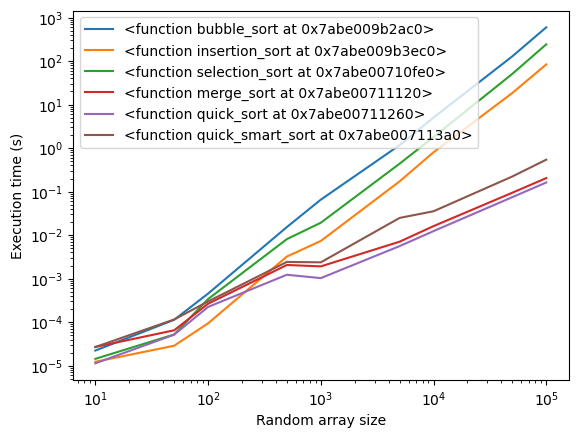

In [67]:
#plotting exec time
import matplotlib.pyplot as plt
for i in range(len(funs)):
    plt.plot(sizes,time[i],label=str(funs[i]))
plt.ylabel('Execution time (s)')
plt.xlabel('Random array size')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

# 2.6 — Comparaison des complexités empiriques 2h30 — Individuel
Testez différentes tailles de tableaux N comme données d’entrée de vos algorithmes de tri.
Affichez les résultats sous la forme d’une figure, afin de pouvoir facilement comparer les
algorithmes.
⚠ Pour une comparaison juste, réfléchissez à une manière de tester l’efficacité de chaque
algorithme avec les mêmes valeurs d’entrée.
Quel algorithme semble être le plus efficace ?

On ajoute le sort natif des list pour la comparaison

In [82]:
from test import *
sizes = [10,50,100,500,1000,5000,10000,50000,100000]
time_native_sort = []
for j in range(len(sizes)):
    A_n = generate_random_array(N=sizes[j])
    # for i in range(len(funs)):
        # A_n_c = A_n.copy()
    time_native_sort.append(timeit.timeit(lambda: test(lambda l: l.sort(), A_n), number=1))
print(time_native_sort)

[3.692999598570168e-06, 5.3679978009313345e-06, 9.826999303186312e-06, 5.1838000217685476e-05, 0.00015481399896088988, 0.0007642999989911914, 0.0020398189990373794, 0.011070877000747714, 0.02200643600008334]


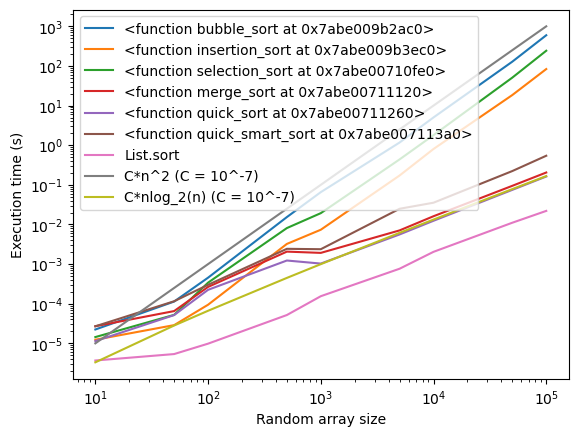

In [110]:
#plotting exec time
import matplotlib.pyplot as plt
for i in range(len(funs)):
    plt.plot(sizes,time[i],label=str(funs[i]))
plt.plot(sizes,time_native_sort,label="List.sort")
n2 = list(map(lambda x : 10**(-7)*x*x,sizes))
nlog2 = list(map(lambda x : 10**(-7)*x*math.log2(x),sizes))
plt.plot(sizes,n2,label="C*n^2 (C = 10^-7)")
plt.plot(sizes,nlog2,label="C*nlog_2(n) (C = 10^-7)")
plt.ylabel('Execution time (s)')
plt.xlabel('Random array size')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

Comparaison théorique :

Avec le diagram suivant on peut voir que les tri selection, insertion et bubble sont en O(n^2)
et que quicksort, merge_sort et List.sort sont en O(nlog_2(n))

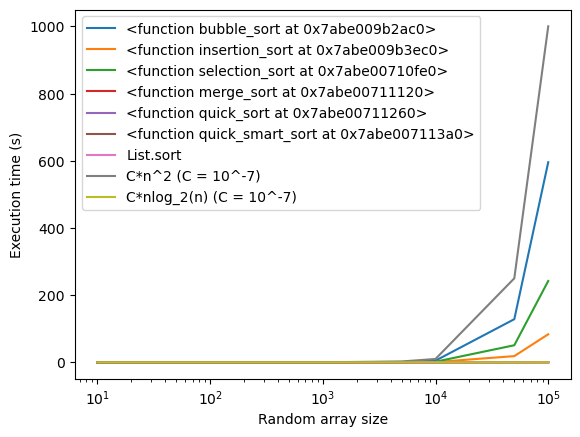

In [113]:
#plotting exec time
import matplotlib.pyplot as plt
for i in range(len(funs)):
    plt.plot(sizes,time[i],label=str(funs[i]))
plt.plot(sizes,time_native_sort,label="List.sort")
n2 = list(map(lambda x : 10**(-7)*x*x,sizes))
nlog2 = list(map(lambda x : 10**(-7)*x*math.log2(x),sizes))
plt.plot(sizes,n2,label="C*n^2 (C = 10^-7)")
plt.plot(sizes,nlog2,label="C*nlog_2(n) (C = 10^-7)")
plt.ylabel('Execution time (s)')
plt.xlabel('Random array size')
plt.xscale('log')
# plt.yscale('log')
plt.legend()
plt.show()

# Chaque algorithme peut être plus ou moins efficace selon l’état de désordre du tableau d’entrée.

    Quels sont les différents types de (dés)ordre possible ?

        - Le pire cas serait pour la plupart des tri, une liste trié par ordre inverse

        le seul algo non-affecté est le tri fusion car sa complexité en pire est O(nlogn)